In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv('/content/final_prepared_data.csv')
df

,level_0,index,Date,Volume,Open,High,Low,Close,Adj close,Sentiment_gpt,...,Open_tomorrow,High_tomorrow,Low_tomorrow,Close_tomorrow,Adj close_tomorrow,Symbol,high_to_low,close_to_open,daily_range_pct,volume_per_price
0,72922,72922,2009-04-14 00:00:00+00:00,7167400.0,87.779999,87.809998,87.040001,87.370003,87.370003,3.00,...,87.419998,87.940002,87.230003,87.500000,87.500000,GLD,1.008846,0.995329,0.008772,82035.020885
1,72923,72923,2009-04-15 00:00:00+00:00,6857000.0,87.419998,87.940002,87.230003,87.500000,87.500000,3.00,...,87.379997,87.449997,85.680000,85.809998,85.809998,GLD,1.008139,1.000915,0.008122,78365.714286
2,72924,72924,2009-04-16 00:00:00+00:00,21033600.0,87.379997,87.449997,85.680000,85.809998,85.809998,3.00,...,85.750000,86.370003,84.919998,85.220001,85.220001,GLD,1.020658,0.982033,0.020256,245118.291556
3,72925,72925,2009-04-17 00:00:00+00:00,22332700.0,85.750000,86.370003,84.919998,85.220001,85.220001,3.00,...,86.029999,87.339996,86.000000,86.949997,86.949997,GLD,1.017075,0.993819,0.016910,262059.371980
4,72926,72926,2009-04-20 00:00:00+00:00,12674400.0,86.029999,87.339996,86.000000,86.949997,86.949997,3.00,...,87.849998,87.879997,86.330002,86.889999,86.889999,GLD,1.015581,1.010694,0.015576,145766.537606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127882,102441,102441,2023-12-20 00:00:00+00:00,54671700.0,139.000000,139.580002,135.369995,135.470001,135.470001,4.40,...,138.139999,139.979996,137.380005,139.910004,139.910004,AMD,1.031100,0.974604,0.030288,403570.528585
127883,102442,102442,2023-12-21 00:00:00+00:00,47179400.0,138.139999,139.979996,137.380005,139.910004,139.910004,4.00,...,140.479996,140.699997,138.309998,139.600006,139.600006,AMD,1.018926,1.012813,0.018821,337212.484920
127884,102443,102443,2023-12-22 00:00:00+00:00,35370400.0,140.479996,140.699997,138.309998,139.600006,139.600006,4.00,...,140.070007,143.850006,139.919998,143.410004,143.410004,AMD,1.017280,0.993736,0.017013,253369.616429
127885,102444,102444,2023-12-26 00:00:00+00:00,47157400.0,140.070007,143.850006,139.919998,143.410004,143.410004,3.75,...,144.720001,146.250000,143.179993,146.070007,146.070007,AMD,1.028088,1.023845,0.028057,328829.222480


In [ ]:
nan_summary = df.isna().sum()

print(nan_summary)


level_0               0
index                 0
Date                  0
Volume                0
Open                  0
High                  0
Low                   0
Close                 0
Adj close             0
Sentiment_gpt         0
News_flag             0
Scaled_sentiment      0
Volume_tomorrow       0
Open_tomorrow         0
High_tomorrow         0
Low_tomorrow          0
Close_tomorrow        0
Adj close_tomorrow    0
Symbol                0
high_to_low           0
close_to_open         0
daily_range_pct       0
volume_per_price      0
dtype: int64


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd


df = pd.read_csv('/content/final_prepared_data.csv')

numerical_columns = ['News_flag', 'Scaled_sentiment', 'Volume_tomorrow', 'Open_tomorrow',
                     'High_tomorrow', 'Low_tomorrow', 'Close_tomorrow', 'Adj close_tomorrow',
                     'high_to_low', 'close_to_open', 'daily_range_pct', 'volume_per_price']
categorical_columns = ['Symbol']

# Impute numerical columns with the mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Impute categorical columns with the mode (most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Features
X = df[['Volume', 'Open', 'High', 'Low', 'Close', 'Adj close',
        'Sentiment_gpt', 'high_to_low', 'close_to_open',
        'daily_range_pct', 'volume_per_price']]

# Target:
y = (df['Close_tomorrow'] > df['Close']).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1500)
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 51.59%


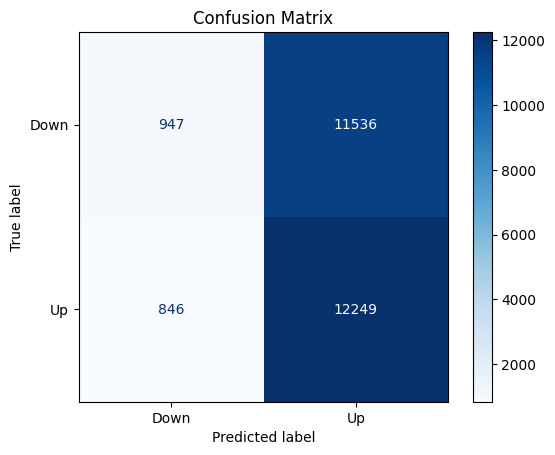

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


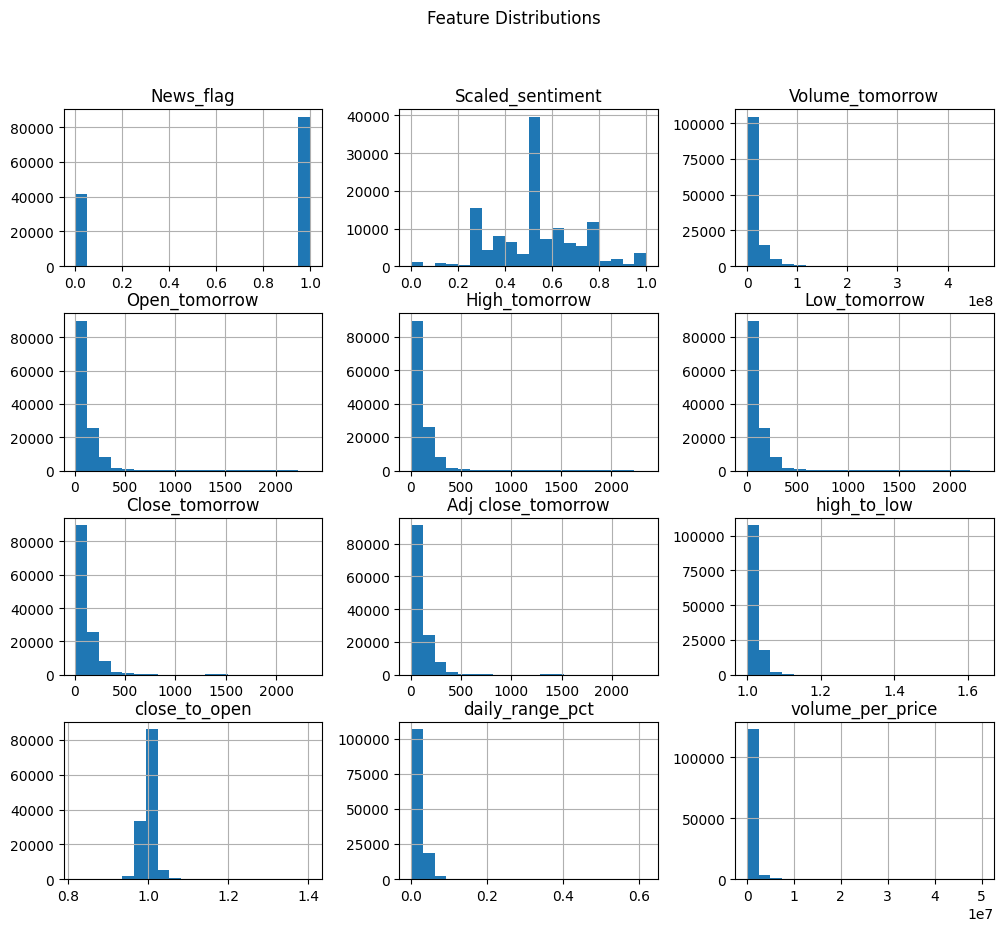

In [ ]:

df[numerical_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()


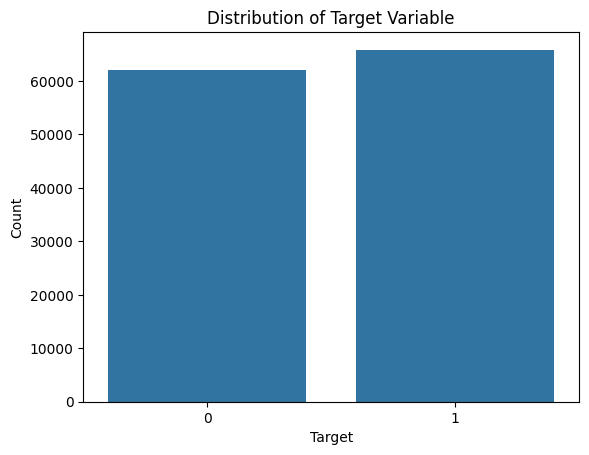

In [ ]:
import seaborn as sns

sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


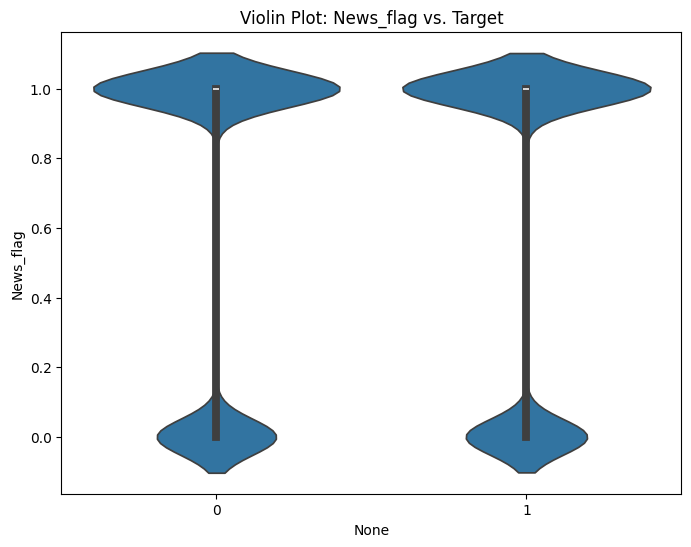

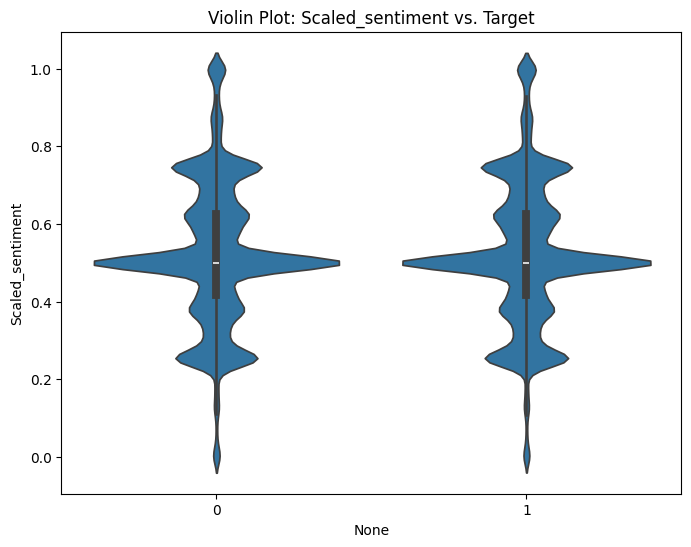

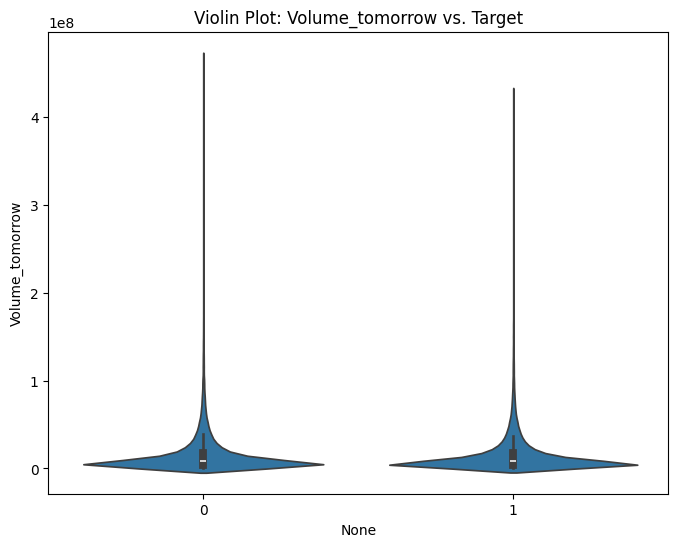

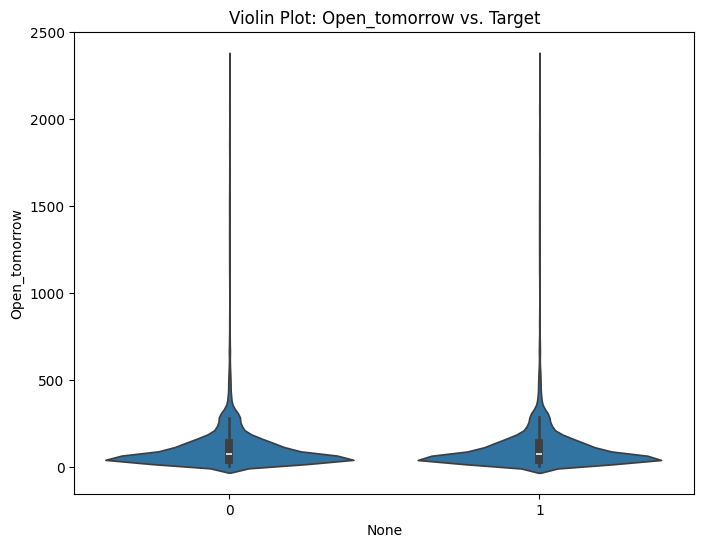

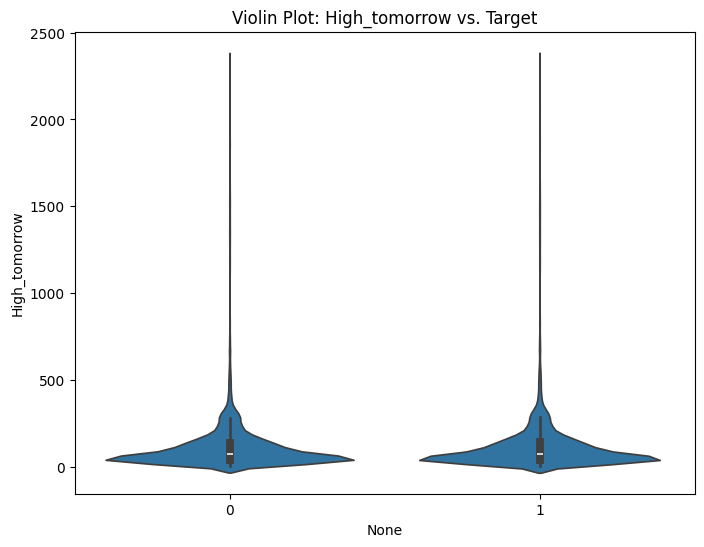

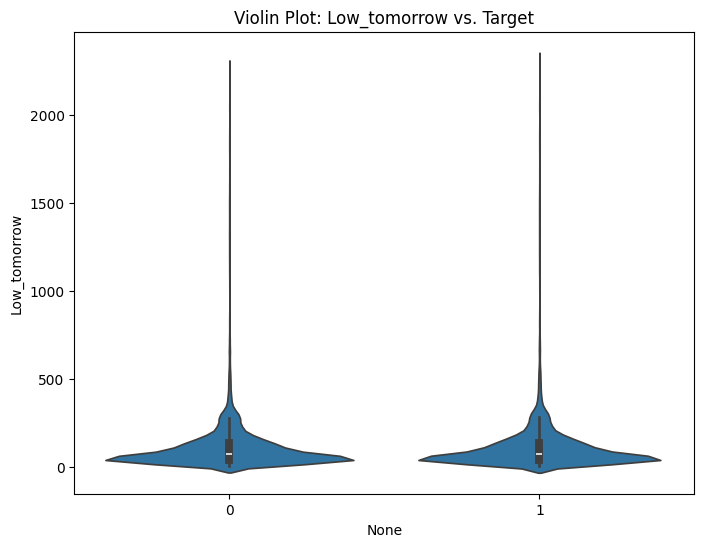

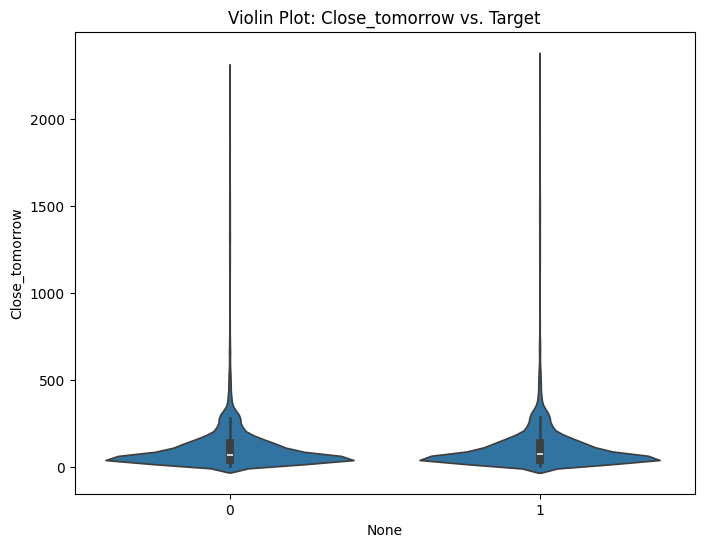

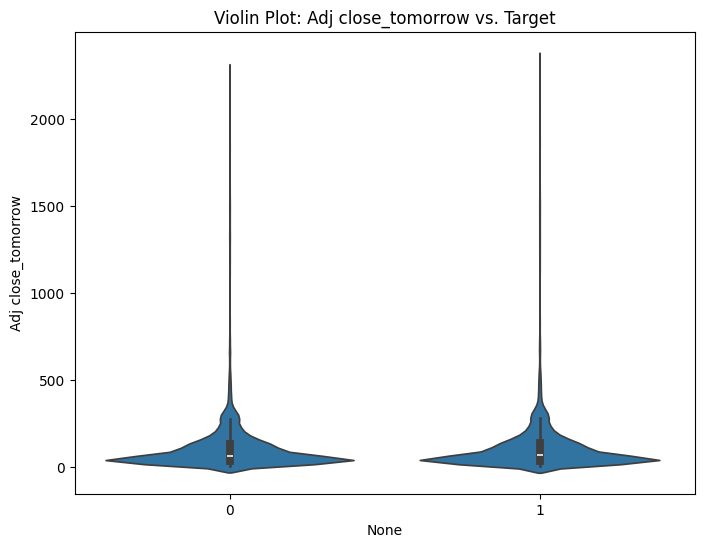

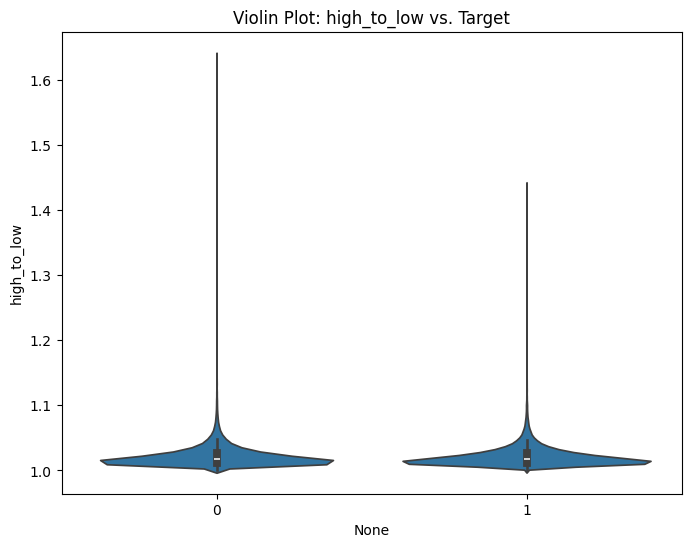

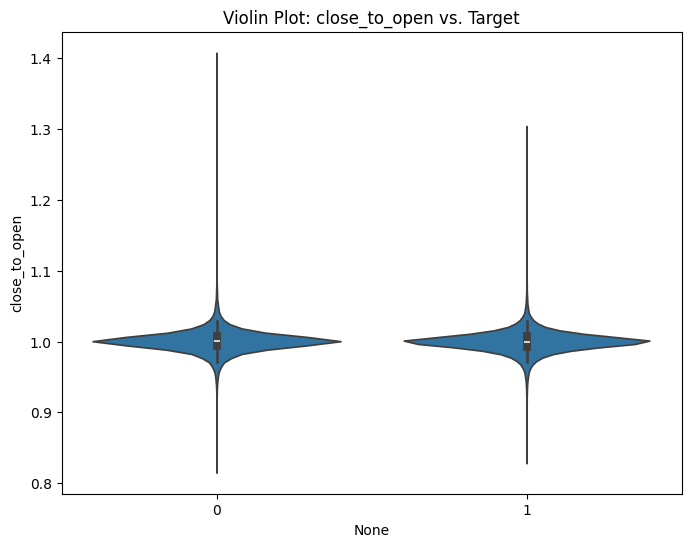

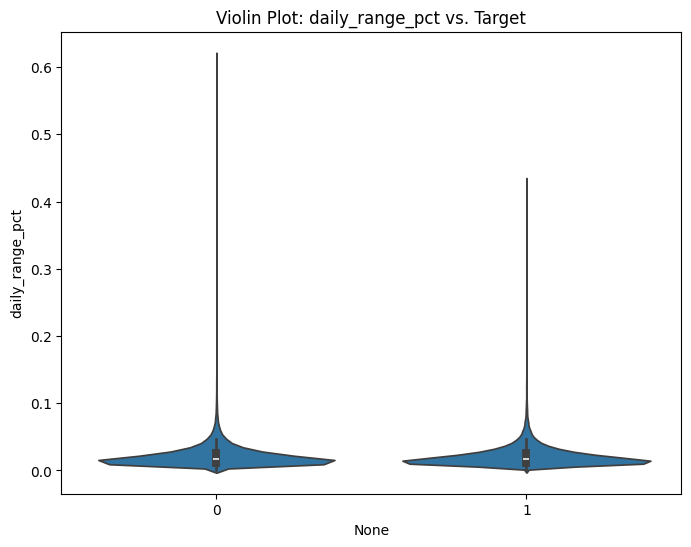

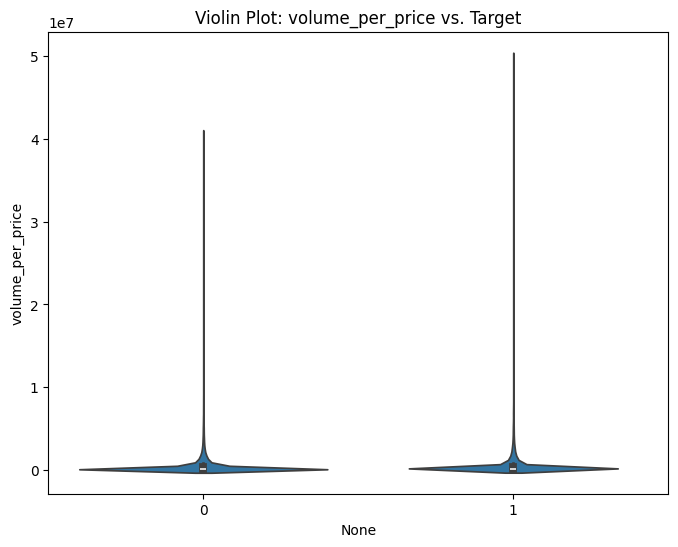

In [ ]:

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=y, y=df[col])
    plt.title(f'Violin Plot: {col} vs. Target')
    plt.show()


MAE: 1.5872284786216717
RMSE: 9.599801395574064
R² Score: 0.9968789757039105


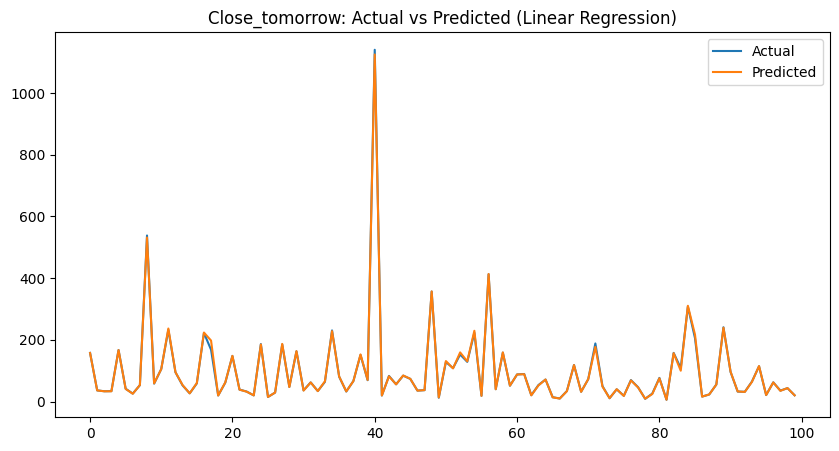

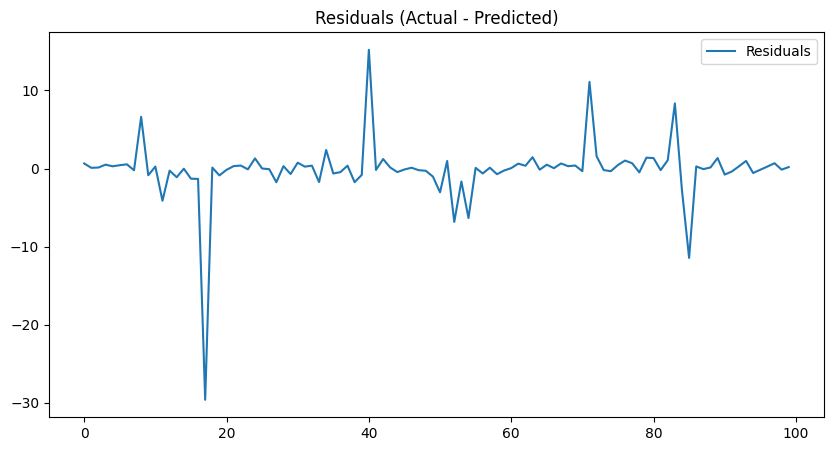

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv('/content/final_prepared_data.csv')

X = df[['Volume', 'Open', 'High', 'Low', 'Close', 'Adj close',
        'Sentiment_gpt', 'high_to_low', 'close_to_open',
        'daily_range_pct', 'volume_per_price']]

y = df['Close_tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("Close_tomorrow: Actual vs Predicted (Linear Regression)")
plt.legend()
plt.show()

residuals = y_test.values - y_pred
plt.figure(figsize=(10, 5))
plt.plot(residuals[:100], label='Residuals')
plt.title("Residuals (Actual - Predicted)")
plt.legend()
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

features2 = ['Volume', 'Open', 'High', 'Low', 'Close', 'Adj close',
            'Sentiment_gpt', 'high_to_low', 'close_to_open',
            'daily_range_pct', 'volume_per_price']
target2 = 'Close_tomorrow'

df = df.dropna(subset=features2 + [target2])

X2 = df[features2]
y2 = df[target2]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


kernels = ['linear']





Training SVR with kernel: linear
Train R²: 0.9994, Train RMSE: 4.3224
Test  R²: 0.9968, Test  RMSE: 9.6464


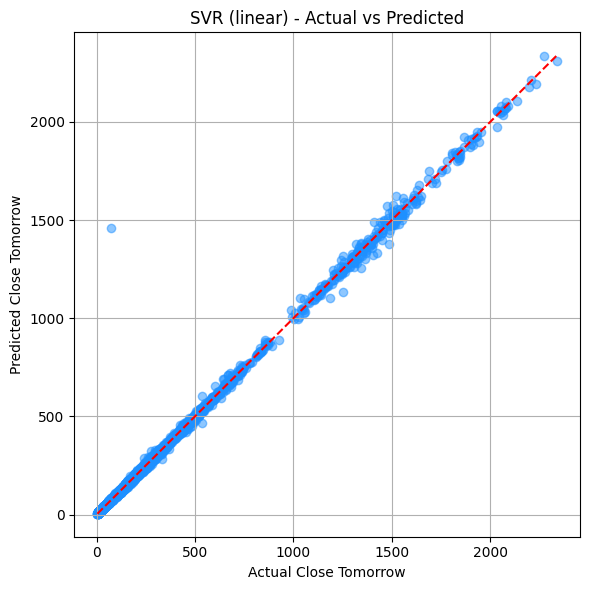

In [6]:
for kernel in kernels:
    print(f"\nTraining SVR with kernel: {kernel}")
    svr = SVR(kernel=kernel, C=3, epsilon=1)
    svr.fit(X_train_scaled, y_train)


    y_pred_train = svr.predict(X_train_scaled)
    y_pred_test = svr.predict(X_test_scaled)


    train_r2 = r2_score(y_train, y_pred_train)
    train_rmse = mean_squared_error(y_train, y_pred_train) ** 0.5

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = mean_squared_error(y_test, y_pred_test) ** 0.5

    print(f"Train R²: {train_r2:.4f}, Train RMSE: {train_rmse:.4f}")
    print(f"Test  R²: {test_r2:.4f}, Test  RMSE: {test_rmse:.4f}")


    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.5, color='dodgerblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Close Tomorrow')
    plt.ylabel('Predicted Close Tomorrow')
    plt.title(f'SVR ({kernel}) - Actual vs Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# eli5

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state=42).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names=X.columns.tolist())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.7 MB/s eta 0:00:00


Weight,Feature
0.1143 ± 0.0017,Close
0.0323 ± 0.0002,High
0.0298 ± 0.0002,Low
0.0003 ± 0.0000,Adj close
0.0000 ± 0.0000,Sentiment_gpt
0.0000 ± 0.0000,daily_range_pct
-0.0000 ± 0.0000,close_to_open
-0.0000 ± 0.0000,Volume
-0.0000 ± 0.0000,volume_per_price
-0.0000 ± 0.0000,high_to_low


In [ ]:
!pip install lime

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Close_tomorrow'],
    mode='regression'
)


idx = 5
explanation = explainer.explain_instance(X_test_scaled[idx], model.predict)

explanation.show_in_notebook()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=85e52c9473e832e9d8ce1d402242a4b8a000af9e820fe10dc112fc01983ba68d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# SHAPE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.1 MB/s eta 0:00:00


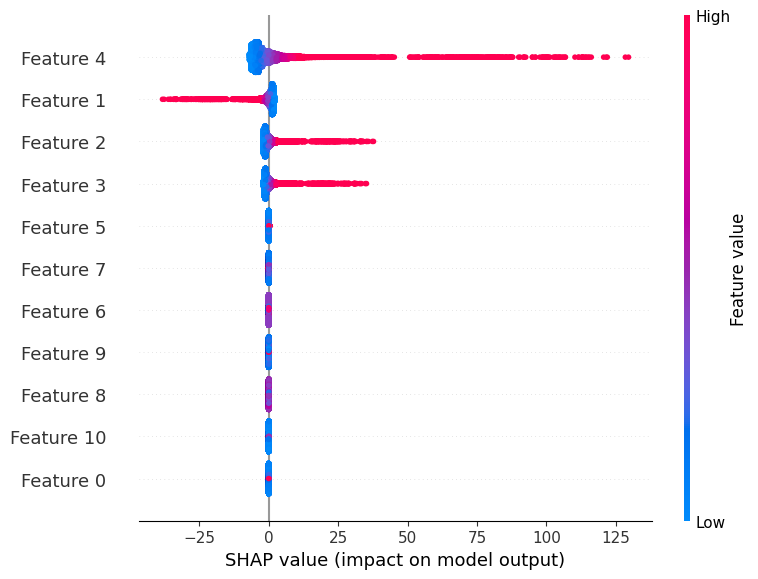

In [ ]:
!pip install shap

import shap

explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled)


# PDP

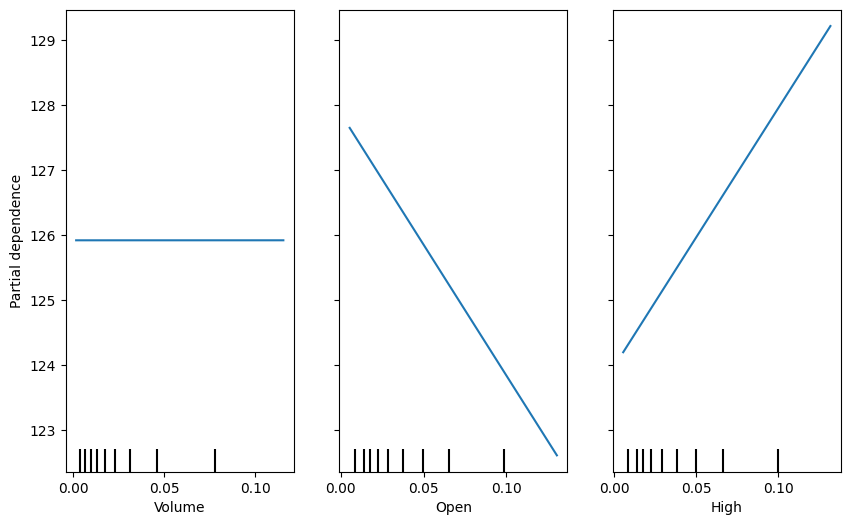

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(model, X_train_scaled, features=[0, 1, 2], feature_names=X.columns.tolist(), ax=ax)
plt.show()


# ICE

In [ ]:
!pip install --upgrade scikit-learn



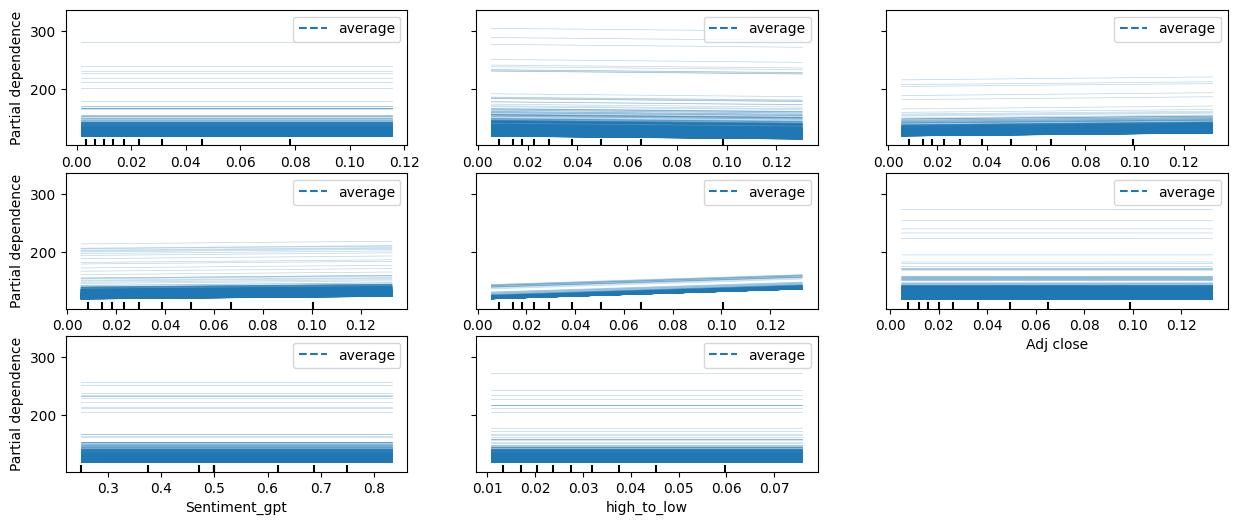

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(15, 6))
PartialDependenceDisplay.from_estimator(model, X_train_scaled, features=[0,1,2,3,4,5,6,7], kind='both', feature_names=X.columns.tolist(), ax=ax)
plt.show()


# 4 Tech For SVM

In [ ]:
!pip install lime
import lime
import lime.lime_tabular

In [ ]:

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features2,
    mode='regression'
)

i = 0
exp = explainer.explain_instance(
    data_row=X_test_scaled[i],
    predict_fn=svr.predict
)

# Show explanation
exp.show_in_notebook(show_table=True)


In [ ]:
print(exp.as_list())


[('Close > 0.06', 81.14292079734352), ('Low > 0.06', 80.11918837767938), ('High > 0.06', 72.72092018425761), ('Open > 0.06', 72.57122609440883), ('Adj close > 0.06', 44.927110070926794), ('daily_range_pct > 0.04', -4.0975580057696135), ('Volume > 0.04', -3.4200645287096654), ('high_to_low > 0.04', 2.9439097754901398), ('0.00 < volume_per_price <= 0.01', -2.6833383603996057), ('Sentiment_gpt <= 0.42', -2.3895722475884105)]


In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.6 MB/s eta 0:00:00


In [ ]:

perm = PermutationImportance(svr, random_state=42)
perm.fit(X_test_scaled, y_test)

eli5.show_weights(perm, feature_names=features2)


Weight,Feature
0.1040 ± 0.0016,Close
0.0977 ± 0.0009,Low
0.0942 ± 0.0007,High
0.0857 ± 0.0009,Open
0.0302 ± 0.0004,Adj close
0.0000 ± 0.0000,close_to_open
0.0000 ± 0.0000,Volume
0.0000 ± 0.0000,daily_range_pct
0.0000 ± 0.0000,high_to_low
0.0000 ± 0.0000,Sentiment_gpt


  0%|          | 0/5 [00:00<?, ?it/s]

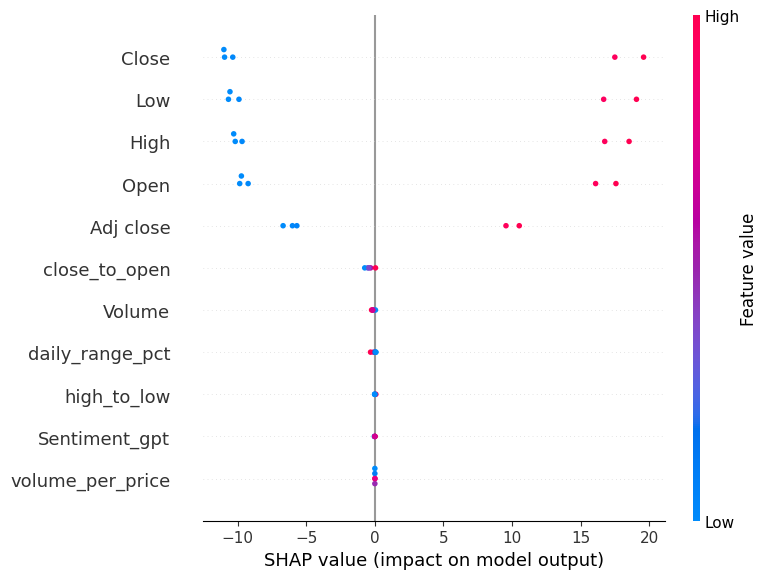

In [7]:
import shap

X_sample = X_test_scaled[:5]

explainer = shap.KernelExplainer(svr.predict, X_train_scaled[:5])
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, feature_names=features2)
